In [1]:
from music21 import *

In [114]:
from pydub import AudioSegment

song = AudioSegment.from_mp3("Giant Steps.mp3")

scaling = 100 #the mp3 is in milliseconds. This informs on how many millisecond to identify in a single bin
print("radomizable elements will be: " + str(math.floor(len(song)/scaling)))

radomizable elements will be: 2868


In [115]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = math.floor(len(song)/scaling)-2

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 10, 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], r=30)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

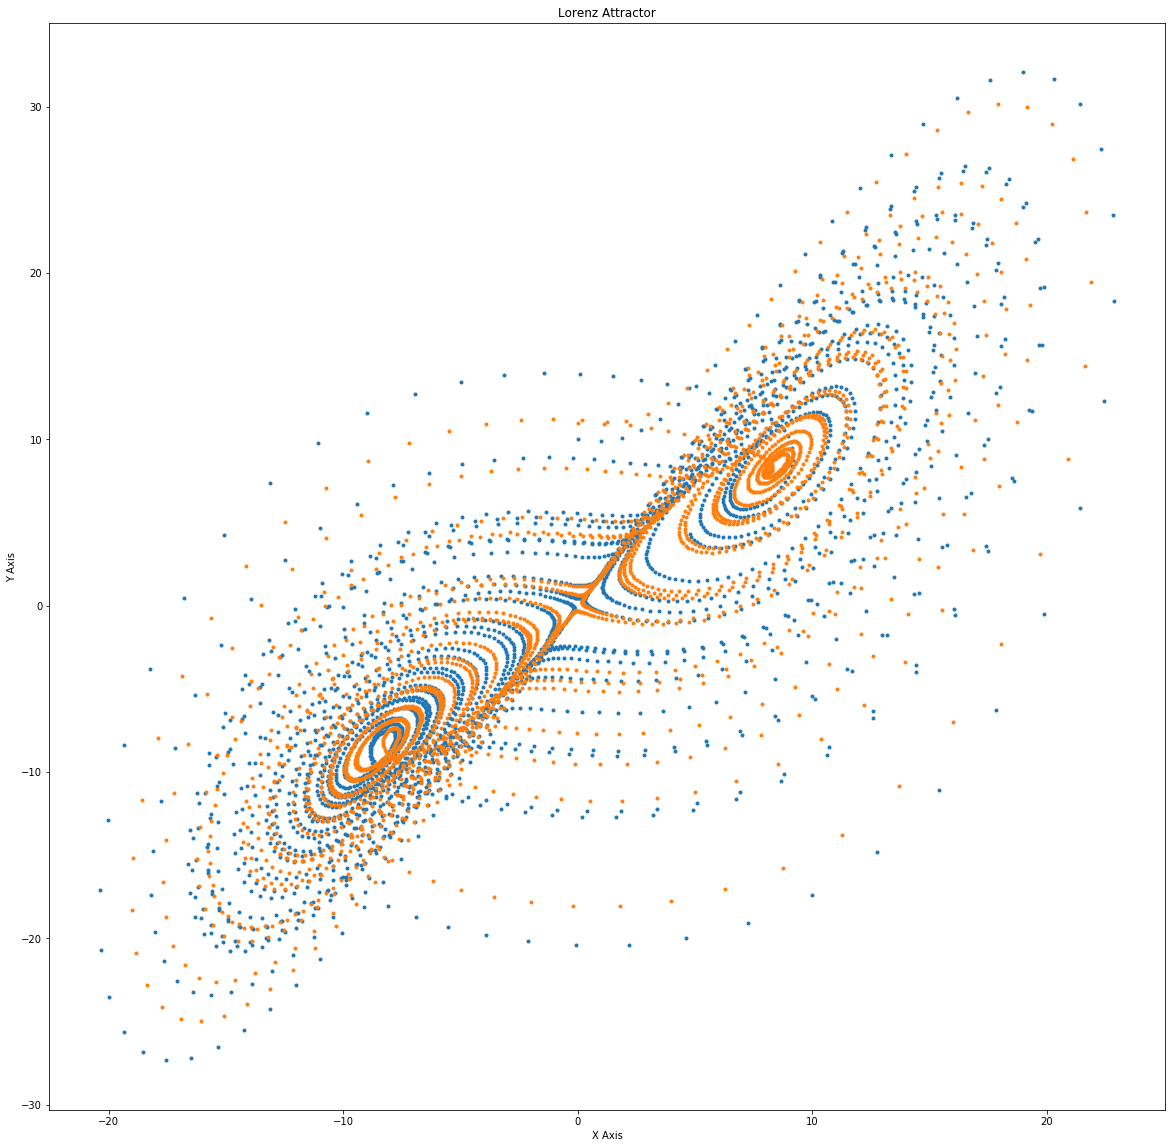

In [116]:
from scipy.spatial import cKDTree
tree = cKDTree(points)
dt = 0.01
num_steps = math.floor(len(song)/scaling)

# Need one more for the initial values
xs2 = np.empty(num_steps + 1)
ys2 = np.empty(num_steps + 1)
zs2 = np.empty(num_steps + 1)

# Set initial values
xs2[0], ys2[0], zs2[0] = (0., 11, 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs2[i], ys2[i], zs2[i], r=28)
    xs2[i + 1] = xs2[i] + (x_dot * dt)
    ys2[i + 1] = ys2[i] + (y_dot * dt)
    zs2[i + 1] = zs2[i] + (z_dot * dt)
points2 = np.array(list(zip(xs2, ys2)))

_, ind = tree.query(points2)

# Plot
fig = plt.figure(figsize=(20,20))
ax = fig.gca()

ax.plot(xs, ys, '.')
ax.plot(xs2, ys2, '.')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz Attractor")

plt.show()

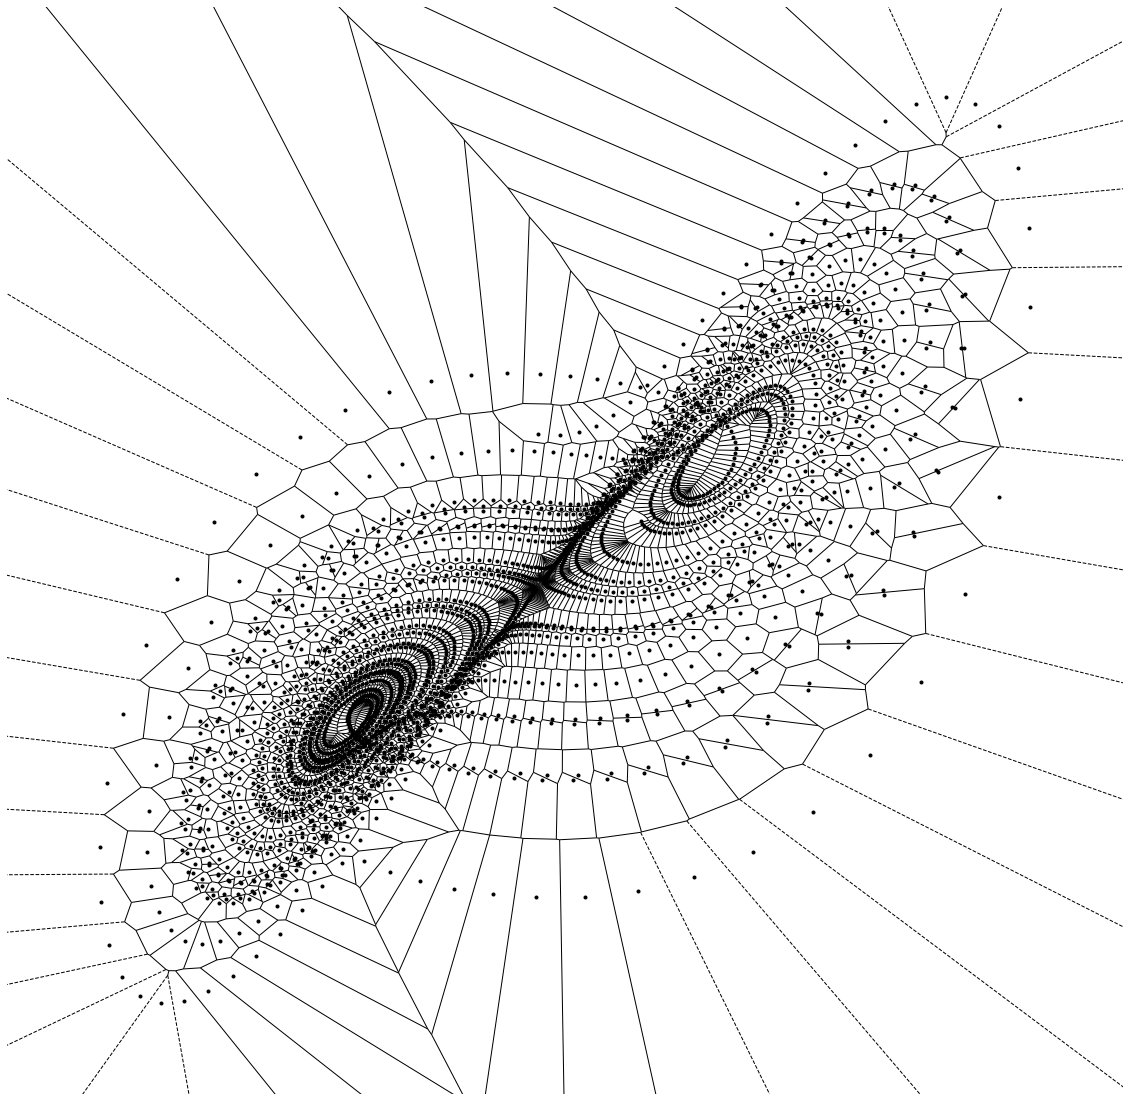

In [117]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.array(list(zip(xs, ys)))
vor = Voronoi(points)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.plot(xs, ys, 'k.')
voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=False)
# for i, point in enumerate(zip(xs, ys)):
#     ax.annotate(i, point)
plt.axis('off')
plt.savefig('LorenzVoronoi.png', transparent=True)
plt.show()

In [118]:
import math
song_new = [song[i*scaling:(i+1)*scaling] for i in range(math.floor(len(song)/scaling) - 1)]

In [119]:
chaosSong = song_new[ind[0]]
for i in range(1, len(ind)):
    chaosSong = chaosSong + song_new[ind[i]]


In [120]:
chaosSong

In [122]:
chaosSong.export("GiantStepsChaos.mp3", format="mp3")

<_io.BufferedRandom name='GiantStepsChaos.mp3'>

In [123]:
noRepetitionInd = list(dict.fromkeys(ind))

In [124]:
chaosSong2 = song_new[noRepetitionInd[0]]
for i in range(1, len(noRepetitionInd)):
    chaosSong2 = chaosSong2 + song_new[noRepetitionInd[i]]

In [125]:
chaosSong2